In [1]:
import torch

데이터 모으기

In [2]:
N=20
random0 = torch.randn(int(N/2), 1)
random5 = torch.randn(int(N/2),1)+5
class1_data = torch.hstack([random0,random5]) # horizontal stack 가로 방향으로 
class2_data = torch.hstack([random5,random0]) 
class1_label = torch.ones(int(N/2),1)
class2_label = torch.zeros(int(N/2),1)
X = torch.vstack([class1_data,class2_data])
y = torch.vstack([class1_label, class2_label])

print(X,y)


tensor([[-0.5205,  4.7853],
        [ 0.6743,  4.3133],
        [ 0.9170,  5.9345],
        [-0.3592,  3.8632],
        [ 1.9310,  4.3025],
        [-0.3345,  6.3751],
        [ 1.9087,  5.7546],
        [-0.3569,  5.7389],
        [ 0.9479,  4.1021],
        [ 0.2708,  4.6513],
        [ 4.7853, -0.5205],
        [ 4.3133,  0.6743],
        [ 5.9345,  0.9170],
        [ 3.8632, -0.3592],
        [ 4.3025,  1.9310],
        [ 6.3751, -0.3345],
        [ 5.7546,  1.9087],
        [ 5.7389, -0.3569],
        [ 4.1021,  0.9479],
        [ 4.6513,  0.2708]]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])


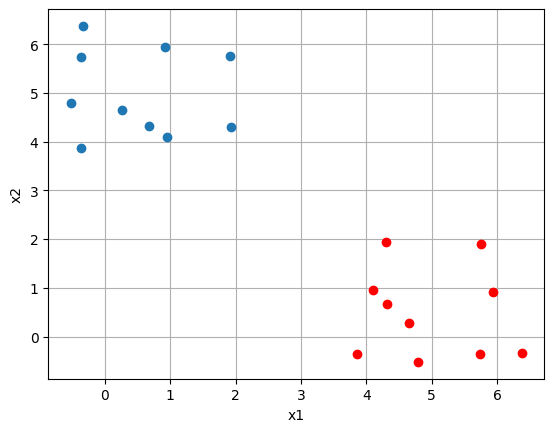

In [3]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1], 'o') 
plt.plot(class2_data[:,0], class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

모델 만들기

In [4]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear = nn.Sequential(nn.Linear(2,100), nn.Sigmoid(), nn.Linear(100,1), nn.Sigmoid())
        
    def forward(self,x):
        x = self.linear(x)
        return x

In [5]:
model = MLP()
print(model)

model.eval() 
with torch.no_grad():
    print(model(torch.randn(5,2)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


In [7]:
from torch import optim

LR = 1e-2
EPOCH = 100
optimizer = optim.Adam(model.parameters(), lr = LR)
criterion = nn.BCELoss()

loss_history= []
grad_history=[]
update_size_history = []

model.train()
for ep in range(EPOCH):
    y_hat = model(X)
    loss = criterion(y_hat,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_history+=[loss.item()]
    print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
    print("-"*20)
    

Epoch: 1, train loss: 0.5741
--------------------
Epoch: 2, train loss: 0.4875
--------------------
Epoch: 3, train loss: 0.4127
--------------------
Epoch: 4, train loss: 0.3480
--------------------
Epoch: 5, train loss: 0.2926
--------------------
Epoch: 6, train loss: 0.2454
--------------------
Epoch: 7, train loss: 0.2055
--------------------
Epoch: 8, train loss: 0.1719
--------------------
Epoch: 9, train loss: 0.1437
--------------------
Epoch: 10, train loss: 0.1201
--------------------
Epoch: 11, train loss: 0.1006
--------------------
Epoch: 12, train loss: 0.0844
--------------------
Epoch: 13, train loss: 0.0710
--------------------
Epoch: 14, train loss: 0.0599
--------------------
Epoch: 15, train loss: 0.0507
--------------------
Epoch: 16, train loss: 0.0431
--------------------
Epoch: 17, train loss: 0.0368
--------------------
Epoch: 18, train loss: 0.0316
--------------------
Epoch: 19, train loss: 0.0273
--------------------
Epoch: 20, train loss: 0.0237
----------

Text(0, 0.5, 'Loss')

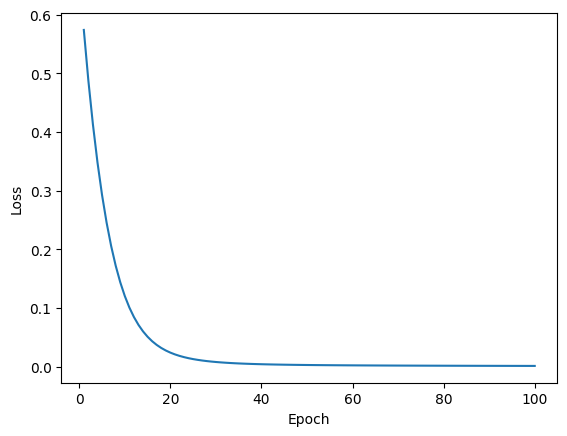

In [8]:
plt.plot(range(1,EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")

# 모델 테스트하기

In [ ]:
x1_test = torch.linspace(-10,10,30)
x2_test = torch.linspace(-10,10,30)
X1_test,X2_test = torch.meshgrid(x1_test,x2_test)
X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim = 2)

model.eval()
with torch.no_grad():
    y_hat = model(X_test)
Y_hat = y_hat.squeeze()

plt.figure(figsize= [10,9])
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)

ax.plot_surface(X1_test,X2_test,Y_hat.numpy(),cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label, 'bo')
plt.plot(class2_data[:,0], class2_data[:,1], class2_label, 'ro')
